In [18]:
import os

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [28]:
f = open(".\measurements.json")
data_json = json.loads(f.read())["Measurements"]

vs = data_json.values()

df = pd.json_normalize(vs)

df.head()



# Index(['Variety', 'RGB_Image', 'Depth_Information', 'FreshWeightShoot','DryWeightShoot', 'Height', 'Diameter', 'LeafArea'],dtype='object')



,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6


In [30]:
df.dtypes

Variety               object
RGB_Image             object
Depth_Information     object
FreshWeightShoot     float64
DryWeightShoot       float64
Height               float64
Diameter             float64
LeafArea             float64
dtype: object

In [20]:
df["ID"] = df["RGB_Image"].str.strip(".png").str.strip("RGB_").apply(int)


In [21]:
df.sort_values("ID", inplace=True)


In [22]:

prev = ""
counter = 0

def add_week_callback(item):
    global counter
    global prev
    print(item)
    if prev != item["Variety"] and item["Variety"] == "Satine":
        counter += 1
    prev = item.Variety
    return counter

df["Week"] = df.apply(func=add_week_callback, axis=1)

df.head()



Variety                   Satine
RGB_Image              RGB_1.png
Depth_Information    Depth_1.png
FreshWeightShoot             2.6
DryWeightShoot              0.14
Height                       8.2
Diameter                    12.0
LeafArea                    80.6
ID                             1
Name: 229, dtype: object
Variety                   Satine
RGB_Image              RGB_2.png
Depth_Information    Depth_2.png
FreshWeightShoot             2.1
DryWeightShoot               0.1
Height                       8.5
Diameter                     8.2
LeafArea                    67.4
ID                             2
Name: 362, dtype: object
Variety                   Satine
RGB_Image              RGB_3.png
Depth_Information    Depth_3.png
FreshWeightShoot             2.0
DryWeightShoot              0.09
Height                       7.5
Diameter                     9.5
LeafArea                    65.0
ID                             3
Name: 258, dtype: object
Variety                   Satine
R

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID,Week
229,Satine,RGB_1.png,Depth_1.png,2.6,0.14,8.2,12.0,80.6,1,1
362,Satine,RGB_2.png,Depth_2.png,2.1,0.10,8.5,8.2,67.4,2,1
258,Satine,RGB_3.png,Depth_3.png,2.0,0.09,7.5,9.5,65.0,3,1
263,Satine,RGB_4.png,Depth_4.png,2.7,0.13,6.0,10.6,78.7,4,1
224,Lugano,RGB_5.png,Depth_5.png,2.3,0.11,8.3,9.8,73.9,5,1


In [23]:
import matplotlib.pyplot as plt

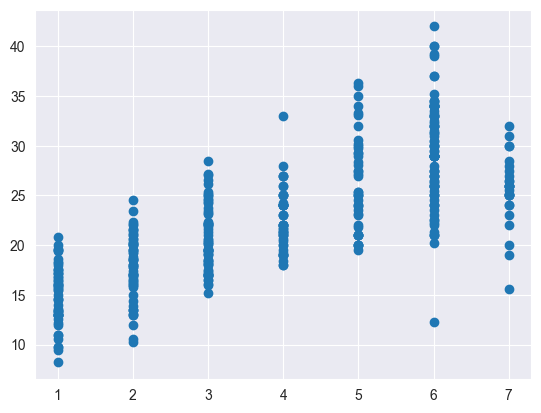

In [24]:
plt.scatter(
    df["Week"],
    df["Diameter"]
)
plt.show()


In [27]:
df.ID.dtype
df.Week.dtype

dtype('int64')